<a href="https://colab.research.google.com/github/theostoican/Guided-Research/blob/main/byol_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

!pip install byol_pytorch
from byol_pytorch import BYOL
from torchvision import models

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(device)
resnet

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
learner = BYOL(
    resnet,
    image_size = 256,
    hidden_layer = 'avgpool',
)

opt = torch.optim.Adam(learner.parameters(), lr=3e-4)

In [ ]:
from torchvision import transforms

from PIL import Image
import os

preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ]) 

print(os.listdir('data'))

dataset = []

for filename in os.listdir('data'):
  img = Image.open(os.path.join('data', filename))
  img = img.convert('RGB')

  img = preprocess(img)

  dataset.append(img)

dataset = torch.stack(dataset).to(device)

['book3.jpg', 'remote17.jpg', 'remote7.jpg', 'baseball3.jpg', 'teddybear16.jpg', 'orange9.jpg', 'cake6.jpg', 'suitcase12.jpg', 'toytrain14.jpg', 'bottle13.jpg', 'ball16.jpg', 'teddybear14.jpg', 'suitcase4.jpg', 'ball9.jpg', 'remote12.jpg', 'donut13.jpg', 'bottle17.jpg', 'broccoli16.jpg', 'toytrain11.jpg', 'bottle10.jpg', 'toytrain12.jpg', 'toytrain15.jpg', 'bottle3.jpg', 'book14.jpg', 'orange2.jpg', 'bottle16.jpg', 'remote4.jpg', 'handbag1.jpg', 'cake3.jpg', 'plant3.jpg', 'teddybear1.jpg', 'donut15.jpg', 'plant5.jpg', 'toytrain17.jpg', 'ball17.jpg', 'book6.jpg', 'toytrain16.jpg', 'remote18.jpg', 'orange17.jpg', 'baseballglove4.jpg', 'teddybear12.jpg', 'apple5.jpg', 'toytrain6.jpg', 'book16.jpg', 'suitcase11.jpg', 'bottle14.jpg', 'suitcase16.jpg', 'teddybear5.jpg', 'skateboard2.jpg', 'backpack5.jpg', 'toytrain18.jpg', 'backpack1.jpg', 'teddybear2.jpg', 'backpack3.jpg', 'baseballglove2.jpg', 'suitcase13.jpg', 'baseball1.jpg', 'broccoli11.jpg', 'frisbee2.jpg', 'orange12.jpg', 'cake14.jpg'

In [ ]:
print(dataset.shape)
print(len(dataset))

torch.Size([245, 3, 256, 256])
245


In [ ]:
import numpy as np

batch_size = 64
num_batches = np.ceil(len(dataset) / batch_size)

resnet.train()

for epoch in range(1000):
  avg_loss = 0
  for batch_idx in np.arange(0, num_batches):
    images = dataset[int(batch_idx * batch_size) : int(np.min([(batch_idx + 1) * batch_size, len(dataset)]))]
    loss = learner(images)
    opt.zero_grad()
    loss.backward()
    opt.step()
    avg_loss += loss.item()
    learner.update_moving_average() # update moving average of target encoder

  avg_loss /= num_batches
  print('Epoch ' + str(epoch) + ' and loss: ' + str(avg_loss))
    # learner.update_moving_average() # update moving average of target encoder

Epoch 0 and loss: 2.4980663061141968
Epoch 1 and loss: 1.4519892930984497
Epoch 2 and loss: 1.3825466334819794
Epoch 3 and loss: 1.3440146148204803
Epoch 4 and loss: 1.205958753824234
Epoch 5 and loss: 1.290217563509941
Epoch 6 and loss: 1.0783657729625702
Epoch 7 and loss: 1.1395358741283417
Epoch 8 and loss: 0.9517666548490524
Epoch 9 and loss: 0.6368197351694107
Epoch 10 and loss: 0.7640950679779053
Epoch 11 and loss: 0.581147737801075
Epoch 12 and loss: 0.7108235284686089
Epoch 13 and loss: 0.6846118196845055
Epoch 14 and loss: 0.5933689326047897
Epoch 15 and loss: 0.3965212106704712
Epoch 16 and loss: 0.246467012912035
Epoch 17 and loss: 0.3792143128812313
Epoch 18 and loss: 0.17878207191824913
Epoch 19 and loss: 0.6906391158699989
Epoch 20 and loss: 0.2418738156557083
Epoch 21 and loss: 0.33589576929807663
Epoch 22 and loss: 0.3607545457780361
Epoch 23 and loss: 0.24397265911102295
Epoch 24 and loss: 0.15940970741212368
Epoch 25 and loss: 0.2974381111562252
Epoch 26 and loss: 0.1

In [ ]:
torch.save(resnet.state_dict(), './2000epochs-pretrained-net.pt')

# Inference

In [ ]:
resnet = models.resnet18(weights=models.ResNet18_Weights.DEFAULT).to(device)
resnet.load_state_dict(torch.load('./2000epochs-pretrained-net-4.pt'))
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
img = Image.open('data/ball1.jpg')
img = img.convert('RGB')

input = preprocess(img).unsqueeze(0).to(device)

resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

resnet.layer4.register_forward_hook(get_activation('attn'))
resnet(input).shape

torch.Size([1, 1000])

In [ ]:
from torch import nn

features = activation['attn'][0]
print(features.shape)
num_channels, num_x, num_y = features.shape
features = features.reshape(num_channels, num_x * num_y)
features = features.T.cpu()
nn.functional.normalize(features, p = 2, dim = 1)
print(features.shape)

torch.Size([512, 8, 8])
torch.Size([64, 512])


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principal_components = pca.fit_transform(features)
print(features.shape, principal_components.shape)

torch.Size([64, 512]) (64, 2)


In [ ]:
import matplotlib.pyplot as plt
# from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=1000,
    random_state=42)

In [ ]:
labels = kmeans.fit_predict(principal_components)
print(labels.shape)
labels = labels.reshape(1, num_x, num_y)
print(torch.FloatTensor(labels).shape)

from torch import nn
labels = nn.functional.interpolate(torch.FloatTensor(labels).unsqueeze(0),
                                   size=(256, 256), mode="nearest")[0][0].cpu().numpy()
# labels = labels[0]
print(labels.shape)

(64,)
torch.Size([1, 8, 8])
(256, 256)


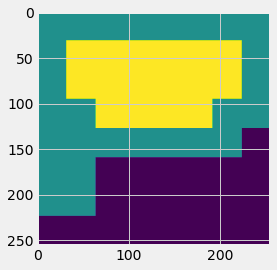

In [ ]:
plt.style.use('fivethirtyeight')
plt.imshow(labels)